# Representation av textdata
I förra notebooken gick vi igenom hur datan måste förbehandlas för maskinläsning. Detta var nödvändiga steg för att minska textens varians och underlätta dess tolkning. Nu ska vi behandla själva läsningen. 

Maskiner kräver att text representeras numeriskt, som siffror. Detta kräver ofta involverad matematik, som vi dock inte kommer att gå igenom här, men det är viktigt att veta varför detta är motiverat. Tillämpningarna av maskinell textanalys inkluderar

- Data mining, information retrieval
- Sentimentanalys
- Maskinöversättning

med många flera. Nyckeln i alla dessa tillämpningar är att vi vill **jämföra** ord eller texter. I information retrieval, som en sökning i en textdatabas/Wikipedia/Google vill vi ange en fråga och få resultat som har med frågan att göra, inte nödvändigtvis matcha ordet. I sentimentanalys vill vi titta på om texter är mer eller mindre positiva än andra, och i maskinöversättning vill vi jämföra hur väl ord passar som översättning till en källtext. 

Om man vill enligt något mått hitta den bästa jämförelsen, är jämförelsen en kvantitativ affär. Det duger alltså inte att göra en kvalitativ jämförelse, eftersom sådana mycket sällan kan eller är villiga att säga vad som är bäst. Vi vill alltså kvantifiera exempelvis likheten mellan ord och texter. Därmed måste varje ord tilldelas ett värde, hur detta värde skall tilldelas är grunden för representationsteori för språkdata.

<div>
<img src="media/comp.png" width="500"/>
</div>

In [1]:
import course.preprocess

data = (course.preprocess.example()
              .remove_punctuation()
              .tokenize()
              .to_lower_case()
              .add_compounds([('digital', 'humanities'), 
                    ('alternate', 'reality'), 
                    ('virtual', 'reality'), 
                    ('cultural', 'analytics'),
                    ('topic', 'modeling')])
              .lemmatize()
              .remove_stopwords(['ha'])
       )

[nltk_data] Downloading package punkt to /home/vws/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vws/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vws/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Bag-of-words
Många representationer av text utgår ifrån vad som kallas *bag-of-words* eller BOW. Gemensamt för dessa tekniker är att de i grunden inte bryr sig om ordens ordning. Ett dokument ses som en samling av ord utan inbördes ordning. Det är en förvånansvärt kraftfull teknik, trots att man bevarar mycket litet semantisk information. 

Några exempel på bag-of-words-tekniker är
- *Ordinal representation*: Orden tilldelas ett unikt heltal.
- *Frekvensrepresentation*: Orden tilldelas ett värde baserat på hur ofta det förekommer i dokumenten.

Majoriteten av all textrepresentation är i någon mån baserad på BOW, trots bristen på spatiell information. 

Vi exemplifierar BOW med två väldigt korta dokument:

1. *Karin och jag har gått ut med hunden två gånger idag. Vad har du gjort?*
2. *Vad du och Karin har gjort bryr jag mig inte om. Jag är upptagen idag och imorgon*

### Ordinal representation
Ordinala tekniker tilldelar varje token en unik siffra. Om det finns 10 tokens i ett dokument kommer dessa få en siffra från 1 till 10. Med ordinal BOW-representation får vi alltså att ovan text kodas

| token | unik siffra | 
| ---   | ---   |   
| karin     | 1 | 
| och       | 2 | 
| jag       | 3 | 
| har       | 4 | 
| gått      | 5 |  
| ut        | 6 | 
| med       | 7 | 
| hunden    | 8 | 
| två       | 9 | 
| gånger    | 10 |
| idag      | 11 |
| Vad       | 12 |
| du        | 13 |
| gjort     | 14 |
| bryr      | 15 |
| mig       | 16 |
| inte      | 17 |
| om        | 18 |
| är        | 19 |
| upptagen  | 20 | 
| imorgon   | 21 |

och dokumenten kan då skrivas som

1. 1 2 3 4 5 6 7 8 9 10 11 12 4 13 14

2. 12 13 2 1 4 14 15 3 16 17 18 3 19 20 21

Denna teknik är nästan alltid olämplig, men varför är inte uppenbart. Genom att ge varje token en siffra har vi också pådyvlat en ordning, en hierarki i orden. På grund av vår representation är denna hierarki också semantiskt meningslös. Vi hävdar att ``jag << mig`` då ``jag = 3`` och ``mig = 16``. Avståndet emellan orden är alltså godtyckligt.

### Distributionshypotesen
Ett grundläggande antagande i språkvetenskapliga sammanhang är vad som kallas distributionshypotesen utvecklad av Zellig Harris i 1954. Harris påstod att likatydande ord kommer att ha en liknande fördelning i en text. Om en text handlar om snöröjning, kommer innehållsorden ``snö``, ``röja``, ``snöröja``, ``kallt`` och kanske ``traktor`` att förekomma ungefär lika många gånger. Detta antyder att de åsyftar ungefär samma semantik. Detta antagande passar bättre ju större en text är, och kommer därför att passa sämre på en ingress än hela ekonomidelen i en tidning.


### Frekvensrepresentation

Ett annat vanligt alternativ är alltså frekvensrepresentationen. Denna utvecklades i linje med just distributionshypotesen, att ord som används i samma kontext tenderar att ha en liknande mening. Denna kontext skulle kunna vara ett dokument. Det kan därför vara värt att beräkna totala frekvensen, samt frekvensen i varje enskilt dokument. Token ``jag`` förekommer exempelvis 1 gång i första dokumentet, 2 gånger i andra, och totalt 3 gångar.


| token | Antal i dokument 1 | Antal i dokument 2 | Antal tot. |
| ---   | ---        | ---        | --- |
| karin     | 1 | 1 | 2 |
| och       | 1 | 1 | 3 |
| jag       | 1 | 2 | 3 |
| har       | 2 | 1 | 3 |
| gått      | 1 | 0 | 1 | 
| ut        | 1 | 0 | 1 |
| med       | 1 | 0 | 1 |
| hunden    | 1 | 0 | 1 |
| två       | 1 | 0 | 1 |
| gånger    | 1 | 0 | 1 |
| idag      | 1 | 1 | 2 |
| Vad       | 1 | 1 | 2 |
| du        | 1 | 1 | 2 |
| gjort     | 1 | 1 | 2 |
| bryr      | 0 | 1 | 1 |
| mig       | 0 | 1 | 1 |
| inte      | 0 | 1 | 1 |
| om        | 0 | 1 | 1 |
| är        | 0 | 1 | 1 |
| upptagen  | 0 | 1 | 1 | 
| imorgon   | 0 | 1 | 1 |

Vad säger denna representation? Jo, i första kolumnen ser vi att det handlar om en hund. Andra dokumentet handlar istället om känslor och att någon är upptagen. Detta kan vi utröna från enbart frekvenserna. Denna representation för varje ord blir mer och mer entydig ju fler dokument man lägger till. Genom att på förhand rensa bort funktionsord (stopp-ord) innehåller frekvenserna snart enbart handlingen i dokumentet.

Frekvensrepresentation är en grundläggande komponent i *Latent Dirichlet Allocation* (LDA), en av de vanligaste temamodellerna (eng. *topic model*).


In [2]:
encoder = data.ordinal_encoding()

print('data: ', encoder(['data']))
print('digital humanities: ', encoder(['digital_humanities']))

data:  [35]
digital humanities:  [46]


In [3]:
encoder = data.count_encoding()

In [4]:
print('mining: ', encoder('mining'))
print('data: ', encoder('data'))
print('digital humanities: ', encoder('digital_humanities'))
print('digital: ', encoder('digital'))
print('game: ', encoder('game'))
print('archaeology: ', encoder('archaeology'))

mining:  3
data:  4
digital humanities:  9
digital:  4
game:  2
archaeology:  1


Observera att vi i vårt exempel endast har ett dokument, vilket är varför många ord förekommer endast en gång. Desto mer dokument som läggs till, desto mer unik representation får man.

## *n*-gram
Ett vanligt alternativ till naiv bag-of-words är så kallade *n*-gram. Dessa har förmågan att representera spatiell information med kort räckvidd, och därmed ta kortare ordning av tokens i beaktande. Ett *n*-gram är en sekvens av *n* tokens i följd. 

Alla texter genererar en uppsättning *n*-gram, antalet varierar med hur stort *n* är. Om *n=2* kallas sekvenserna bigram, om *n=3* kallas de trigram och om *n=1* ibland för unigram. Dessa genereras vanligtvis genom att ett överlappande "fönster" med en viss storlek traverserar dokumentet.

Vi illustrerar detta med bigram genererade från första dokumentet ovan. Det första bigrammet blir således ``(Karin, och)`` följt av en överlappande ``(och, jag)``, och sedan ``(jag, har)``, o.s.v. Bigram har fördelen att de bevarar semantisk information med kort räckvid. I germanska språk som svenska och engelska fångar detta exempelvis sammansättningar, tempus och partikelverb. 

![SegmentLocal](media/bigrams.gif "segment")


En vanlig förfining av bag-of-words blir då att man genererar en bag-of-n-grams istället, där varje token är ett *n*-gram. Det följer också då att en vanlig bag-of-words är en bag-of-unigrams. *n*-gram har nackdelen att de behöver relativt mycket lagring och ofta är svåra att arbeta med. Vinningen att ta med den spatiella informationen är således mindre än att helt enkelt använda större och bättre dokument.

In [5]:
[ngram for ngram in data.to_ngrams(n=2)]

[('definition', 'digital_humanities'),
 ('digital_humanities', 'continually'),
 ('continually', 'formulated'),
 ('formulated', 'scholar'),
 ('scholar', 'practitioner'),
 ('practitioner', 'since'),
 ('since', 'field'),
 ('field', 'constantly'),
 ('constantly', 'growing'),
 ('growing', 'changing'),
 ('changing', 'specific'),
 ('specific', 'definition'),
 ('definition', 'quickly'),
 ('quickly', 'become'),
 ('become', 'outdated'),
 ('outdated', 'unnecessarily'),
 ('unnecessarily', 'limit'),
 ('limit', 'future'),
 ('future', 'potential'),
 ('potential', '4'),
 ('4', 'second'),
 ('second', 'volume'),
 ('volume', 'debate'),
 ('debate', 'digital_humanities'),
 ('digital_humanities', '2016'),
 ('2016', 'acknowledges'),
 ('acknowledges', 'difficulty'),
 ('difficulty', 'defining'),
 ('defining', 'field'),
 ('field', 'along'),
 ('along', 'digital'),
 ('digital', 'archive'),
 ('archive', 'quantitative'),
 ('quantitative', 'analysis'),
 ('analysis', 'tool_building'),
 ('tool_building', 'project'),
 

## Vektormodeller
Vi har nu redogjort för en metod att ge varje ord ett värde, förslagsvis baserat på den totala frekvensen i alla dokument vi arbetar med. Det är nu upp till datorn att göra en jämförelse mellan orden.

Hittills har vi givit alla ord ett värde. Detta motsvaras av att alla ord i vokabuläret ligger arrangerade på en linje. Dessvärre medför detta att orden är "trångt" placerade. Det finns väldigt få dimensioner av likheter som kan fångas på endast en linje - ett ord som ``man`` kan kanske inte vara nära alla ``människa``, ``maskulin``, ``person`` och ``kvinna``, och det inbördes arrangemanget blir mycket komplicerat.


<div>
<img src="media/1d.png" width="500"/>
</div>

I ovan exempel blir det uppenbart att det är svårt att arrangera orden så att vi kan bevara avståndet ``kvinna-drottning`` utan att öka avståndet ``kvinna-person`` till den gräns att det är mycket längre än motsvarande avstånd ``man-person``. Detta är bara ett exempel, som kan slå mot vilken semantisk betydelse som helst.

Lösningen på detta är att introducera en ny dimension i vilken avstånden till orden kan definieras. Det motsvaras av att ett ord representeras av två ord, inte ett. Detta kallas för en **vektormodell** (vektor är en matematisk term som förenklat motsvarar en lista av värden). 

<div>
<img src="media/2d.png" width="500"/>
</div>

Med två dimensioner att leka med är det väsentligt lättare att bevara avståndet mellan ``man-kvinna``, ``kung-drottning`` och ``man-person``, ``kvinna-person``. Denna representation är intuitiv - ord är ofta definierade av många olika konnotationer, och kan dessutom ha flera olika referenter. En mer humanistiskt medveten representation ger alltså utrymme för bredden hos ordsemantiken. Det följer också att det blir enklare desto fler dimensioner vi lägger till - oftast använder man från 100 upp till 1000 dimensioner i verkliga tillämpningar.

Downloading, this will take some time...
- Done! Initializing...


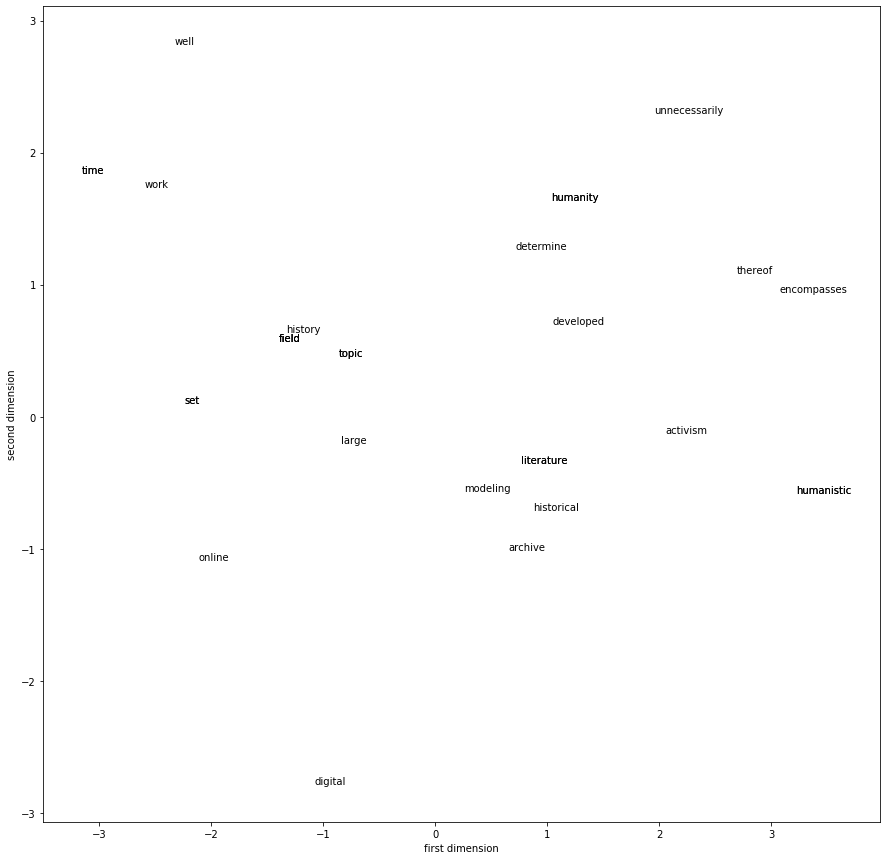

In [10]:
fig, ax = course.embeddings_example()